In [1]:
from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
import os
os.chdir('../programming_scripts/.')
print(os.getcwd())

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

#from Spec2Vec_annotation import motif_annotation

from MS2LDA_core import load_mgf
from MS2LDA_core import clean_spectra

from utils import motifs2spectra
from spec2vec import Spec2Vec

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\programming_scripts


In [20]:
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [21]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=6, iterations=300)

In [22]:
motif_spectra = motifs2spectra(lda_model)

### how to load the embeddings and then still retrieve the smiles afterwards

In [23]:
import pandas as pd

In [24]:
from Spec2Vec_annotation import load_model_and_data
from Spec2Vec_annotation import calc_similarity
from Spec2Vec_annotation import retrieve_top_hits

In [25]:
s2v_model, embeddings_smiles_DB = load_model_and_data()

In [52]:
smiles = embeddings_smiles_DB.smiles.to_numpy()
embeddings_DB = embeddings_smiles_DB.embeddings.to_list()
spectra_DB = embeddings_smiles_DB.spectra.to_list()

In [53]:
s2v_scores = calc_similarity(s2v_model, motif_spectra, embeddings_DB)

In [56]:
top_scores, top_smiles, top_spectra = retrieve_top_hits(s2v_scores, 5, smiles, spectra_DB)

In [57]:
top_scores

(0.8343679157796524,
 0.8343479884549256,
 0.830908753514659,
 0.8289329372561467,
 0.8273092228643626,
 0.7924721037963902,
 0.7924721037963902,
 0.7923873476893448,
 0.7923873476893448,
 0.7908260348824603)

In [58]:
top_smiles

['CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C',
 'CCCc1nc(c2n1nc([nH]c2=O)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC4)CC)C']

[(55.05, 0.0011817435347657632), (56.05, 0.004095834526089147), (57.06, 0.00392956721687837), (58.06, 0.021560151674710804), (58.07, 0.0012429822391390398), (70.07, 0.012523624514425563), (71.07, 0.002518402094327384), (72.08, 0.04925087128824847), (72.09, 0.0021535659852067054), (72.09, 0.0019115124339046416), (80.05, 0.0011300557616959392), (82.07, 0.004078579335764421), (83.06, 0.0012320196995922559), (84.08, 0.005960427015461553), (94.05, 0.001851056828021785), (95.06, 0.0020333657808748514), (96.08, 0.0012141101507916919), (97.08, 0.0010477537977975318), (98.08, 0.009708123029106192), (99.09, 0.016572706441216552), (108.07, 0.0012927342122135389), (110.06, 0.00563460769104704), (111.09, 0.007151996249984316), (112.1, 0.002437657431413712), (113.11, 0.0338713575149589), (114.11, 0.008643967132405048), (115.12, 0.003686457728898685), (121.08, 0.001587181256777331), (122.08, 0.001251955351010526), (123.09, 0.013786223324451296), (124.1, 0.002312454494181443), (140.06, 0.0029766081159

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'vardenafil'}, xlabel='m/z', ylabel='Intensity'>)

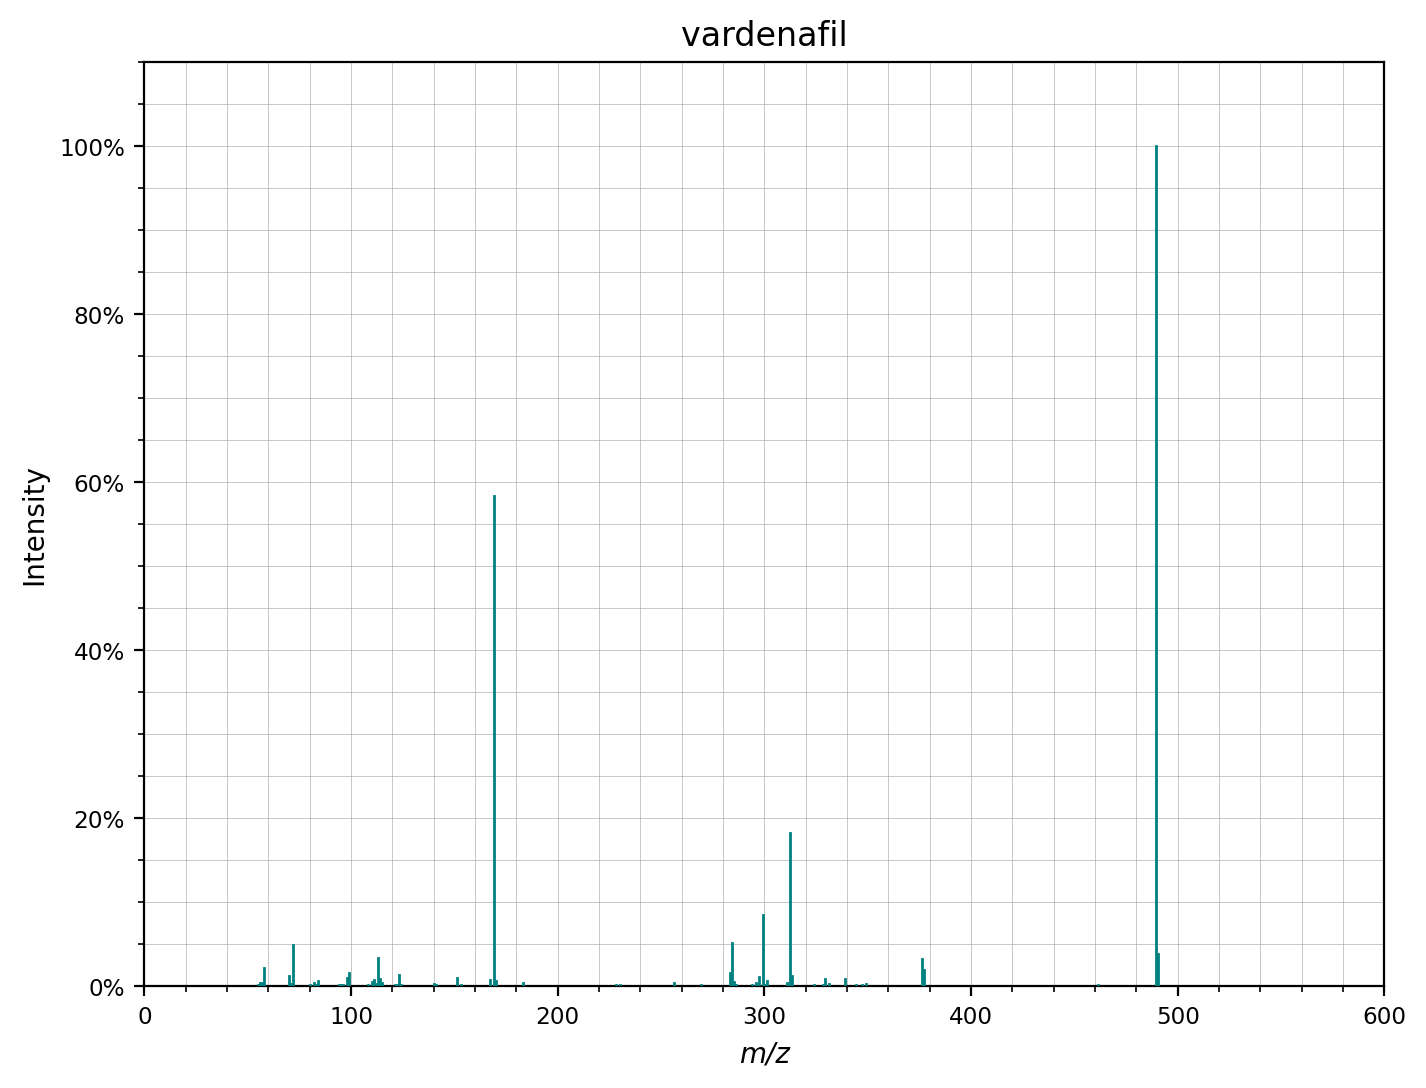

In [85]:
i = i
print(list(zip(top_spectra[i].peaks.mz, top_spectra[i].peaks.intensities)))
top_spectra[i].plot()

---

### New Part: Retrieve overlaping fragments between spectra with motif spectra

In [28]:
from utils import match_frags_and_losses

In [29]:
# just to get some spectra: it is really important that the spectra are binned
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra_per_motifs = predict_with_lda(lda_model, spectra_path, id2word)

In [30]:
i = 5

In [31]:
matching_frags, matching_losses = match_frags_and_losses(motif_spectra[i], spectra_per_motifs[i])

In [32]:
matching_frags

[{58.06, 99.09, 491.19},
 {58.06, 99.09, 154.67, 169.1, 505.23},
 {58.06, 99.09, 154.67, 169.1, 489.23},
 {58.06, 99.09, 154.67, 532.26},
 {135.04, 154.67, 204.08, 262.09}]

In [33]:
matching_losses

[set(), set(), set(), set(), set()]

### New Part: Use MassQL to search for matches

BEGIN IONS(?:.|\n)+?END IONS

In [3]:
from MassQL_annotation import initialize_massql_DB
from MassQL_annotation import add_column
from MassQL_annotation import search_massql_DB
from MassQL_annotation import correct_mgf_scannumber

In [4]:
spectra_path_GNPS = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\raw_data\GNPS\cleaned_spectra_min_5_peaks.mgf"

In [5]:
%%time
correct_mgf_scannumber(spectra_path_GNPS)

CPU times: total: 21.2 s
Wall time: 21.2 s


'Done'

In [6]:
ms1_df, ms2_df = initialize_massql_DB(spectra_path_GNPS[:-4] + "_corrected_scans.mgf")

In [7]:
ms1_df

,i,i_norm,i_tic_norm,mz,scan,rt,precmz,ms1scan,charge,polarity
0,0.008392,0.008392,0.006534,173.521896,283261,0,0,0,1,1


In [8]:
ms2_df

,i,i_norm,i_tic_norm,mz,scan,rt,precmz,ms1scan,charge,polarity
0,0.010553,0.010553,0.000843,289.286377,1,0,0,0,1,1
1,0.029439,0.029439,0.002352,295.545288,1,0,0,0,1,1
2,0.005134,0.005134,0.000410,298.489624,1,0,0,0,1,1
3,0.024515,0.024515,0.001959,317.324951,1,0,0,0,1,1
4,0.011254,0.011254,0.000899,319.655945,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
21288060,1.000000,1.000000,0.778560,74.024498,283261,0,0,0,1,1
21288061,0.163899,0.163899,0.127606,74.029800,283261,0,0,0,1,1
21288062,0.040293,0.040293,0.031371,74.032402,283261,0,0,0,1,1
21288063,0.029471,0.029471,0.022945,128.107895,283261,0,0,0,1,1


In [9]:
ms1_df.to_parquet("ms1_massql.parquet")

In [10]:
ms2_df.to_parquet("ms2_massql.parquet")

In [12]:
ms2_df.loc[ms2_df["scan"] == 2]

,i,i_norm,i_tic_norm,mz,scan,rt,precmz,ms1scan,charge,polarity


In [13]:
# store ms1_df and ms2_df right away!!!

In [14]:
def generate_query(i):
    input_query_base = "QUERY scaninfo(MS2DATA) WHERE"
    input_query = "QUERY scaninfo(MS2DATA) WHERE"
    for matching_frag in matching_frags[i]:
        if input_query == input_query_base:
            input_query += f" MS2PROD={matching_frag}"
        else:
            input_query += f" AND MS2PROD={matching_frag}"
    for matching_loss in matching_losses[i]:
         if input_query == input_query_base:
            input_query += f" MS2PROD={matching_loss}"
         else:
            input_query += f" AND MS2PROD={matching_loss}"

    return input_query

In [39]:
input_query = generate_query(2)

In [40]:
input_query

'QUERY scaninfo(MS2DATA) WHERE MS2PROD=99.09 AND MS2PROD=58.06 AND MS2PROD=169.1 AND MS2PROD=489.23 AND MS2PROD=154.67'

In [81]:
input_query = "QUERY scaninfo(MS2DATA) WHERE MS2PROD=99.09:TOLERANCEMZ=0.01 AND MS2PROD=58.06:TOLERANCEMZ=0.01 AND MS2PROD=169.10:TOLERANCEMZ=0.01 AND MS2PROD=312.16:TOLERANCEMZ=0.01 AND MS2PROD=299.11:TOLERANCEMZ=0.01"# AND MS2PROD=154.67:TOLERANCEMZ=0.01"

In [78]:
spectra_path_GNPS

'C:\\Users\\dietr004\\Documents\\PhD\\computational mass spectrometry\\Spec2Struc\\Project_SubstructureIdentification\\raw_data\\GNPS\\cleaned_spectra_min_5_peaks.mgf'

In [75]:
from massql import msql_engine

In [82]:
results_df = msql_engine.process_query(input_query, spectra_path_GNPS[:-4] + "_corrected_scans.mgf", ms1_df=ms1_df, ms2_df=ms2_df)

TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]


In [83]:
results_df

,scan,precmz,ms1scan,rt,charge,i,i_norm,mslevel,i_norm_ms1
0,175571,0,0,0,1,33.161000,1.0,2,NaN
1,235397,0,0,0,1,18.695596,1.0,2,NaN
2,237726,0,0,0,1,16.265825,1.0,2,NaN
3,240452,0,0,0,1,21.946246,1.0,2,NaN
4,246174,0,0,0,1,29.555288,1.0,2,NaN
5,252377,0,0,0,1,5.923914,1.0,2,NaN
6,252378,0,0,0,1,6.646693,1.0,2,NaN
7,255033,0,0,0,1,20.788426,1.0,2,NaN
8,255774,0,0,0,1,15.512237,1.0,2,NaN
9,256588,0,0,0,1,14.493077,1.0,2,NaN


In [36]:
# single test:
input_query = generate_query(1)
results_df = search_massql_DB(spectra_path_GNPS, input_query, ms1_df, ms2_df)
print(results_df.to_numpy())

TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.79s/it]


KeyboardInterrupt: 

In [23]:
for i in range(len(matching_frags)):
    input_query = generate_query(i)
    results_df = search_massql_DB(spectra_path, input_query, ms1_df, ms2_df)
    print(results_df.to_numpy())

TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.76it/s]


[[594 491.18946 0 674.1 1 3.3262899999999997 1.0 2 nan
  'CCCC1=NN(C2=C1NC(=NC2=S)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C']]
TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.33it/s]


[[215 505.22332 0 539.78 1 2.53269 1.0 2 nan
  'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCC)C']]
TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.65it/s]


[[222 489.22767 0 540.68 1 2.4637499999999997 1.0 2 nan
  'CCCC1=NC(=C2N1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CC)OCC)C']]
TOTAL QUERIES 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.63it/s]

[[483 532.25912 0 647.78 1 4.54353 1.0 2 nan
  'CCCC1=CN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCCC)CC']]
TOTAL QUERIES 1



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 99.99it/s]

[[313 390.14504 0 622.64 1 4.5408100000000005 1.0 2 nan
  'CN1CC(=O)N2[C@H](Cc3c([nH]c4ccccc34)[C@H]2c2ccc3c(c2)OCO3)C1=O']
 [321 391.14041 0 584.59 1 3.836 1.0 2 nan
  'C1C2C(=O)N(CC(=O)N2C(C3=C1C4=CC=CC=C4N3)C5=CC6=C(C=C5)OCO6)N']
 [420 433.15077 0 588.35 1 4.25434 1.0 2 nan
  'CC(=O)NN1CC(=O)N2C(C1=O)CC3=C(C2C4=CC5=C(C=C4)OCO5)NC6=CC=CC=C36']]
